### Building your network

In [1]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.65))
model.add(layers.Dense(128, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       295168    
__________

In [2]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

### Data preprocessing
Using ImageDataGenerator to read images from directories

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "../dataset_splits/train"
validation_dir = "../dataset_splits/validation"

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')

Found 6397 images belonging to 6 classes.
Found 1196 images belonging to 6 classes.


### Fitting the model using a batch generator

In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=43)

Epoch 1/100
230/230 [==============================] - 81s 352ms/step - loss: 1.4401 - acc: 0.4732 - val_loss: 1.2710 - val_acc: 0.5760
Epoch 2/100
230/230 [==============================] - 72s 314ms/step - loss: 0.9672 - acc: 0.7052 - val_loss: 0.8519 - val_acc: 0.7448
Epoch 3/100
230/230 [==============================] - 72s 314ms/step - loss: 0.8232 - acc: 0.7624 - val_loss: 0.8355 - val_acc: 0.7640
Epoch 4/100
230/230 [==============================] - 72s 314ms/step - loss: 0.7284 - acc: 0.7988 - val_loss: 0.7306 - val_acc: 0.7906
Epoch 5/100
230/230 [==============================] - 72s 315ms/step - loss: 0.6896 - acc: 0.8154 - val_loss: 0.7185 - val_acc: 0.8016
Epoch 6/100
230/230 [==============================] - 73s 318ms/step - loss: 0.6500 - acc: 0.8324 - val_loss: 0.7115 - val_acc: 0.8186
Epoch 7/100
230/230 [==============================] - 72s 315ms/step - loss: 0.5967 - acc: 0.8544 - val_loss: 0.5700 - val_acc: 0.8650
Epoch 8/100
230/230 [===========================

Epoch 61/100
230/230 [==============================] - 72s 315ms/step - loss: 0.3189 - acc: 0.9663 - val_loss: 0.4554 - val_acc: 0.9229
Epoch 62/100
230/230 [==============================] - 73s 316ms/step - loss: 0.3217 - acc: 0.9679 - val_loss: 0.4554 - val_acc: 0.9240
Epoch 63/100
230/230 [==============================] - 73s 318ms/step - loss: 0.3188 - acc: 0.9663 - val_loss: 0.5257 - val_acc: 0.9019
Epoch 64/100
230/230 [==============================] - 74s 320ms/step - loss: 0.3251 - acc: 0.9653 - val_loss: 0.4926 - val_acc: 0.9152
Epoch 65/100
230/230 [==============================] - 73s 315ms/step - loss: 0.3010 - acc: 0.9686 - val_loss: 0.4073 - val_acc: 0.9351
Epoch 66/100
230/230 [==============================] - 72s 313ms/step - loss: 0.3098 - acc: 0.9643 - val_loss: 0.4569 - val_acc: 0.9240
Epoch 67/100
230/230 [==============================] - 72s 313ms/step - loss: 0.3280 - acc: 0.9641 - val_loss: 0.4474 - val_acc: 0.9285
Epoch 68/100
230/230 [===================

### Saving the model

In [5]:
model.save('./saved model/tomato_small_1.h5')

### Displaying curves of loss and accuracy during training

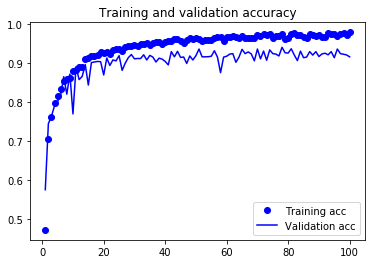

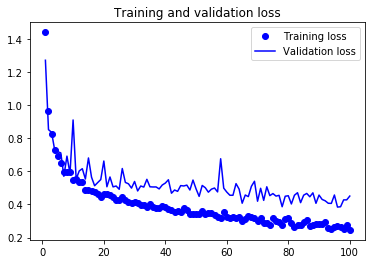

In [6]:
import matplotlib.pyplot as plt
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Train the model on all samples (Training and Validation)

In [7]:
test_dir = "../dataset_splits/test"

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


Found 395 images belonging to 6 classes.


In [8]:
score = model.evaluate_generator(test_generator, steps=40, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [9]:
print(score)

[0.42828453030366825, 0.9194741171701285]
